To Do!

- Percentage of people who have gotten their first job vs how many looking
- Used resources
    - In which country the resource originated
    - Traffic data for resource?
- Countries
- Spoken language

In [11]:
import os.path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [12]:
headers = 'Age,"AttendedBootcamp","BootcampFinish","BootcampFullJobAfter","BootcampLoanYesNo","BootcampMonthsAgo","BootcampName","BootcampPostSalary","BootcampRecommend","ChildrenNumber","CityPopulation","CodeEventBootcamp","CodeEventCoffee","CodeEventConferences","CodeEventDjangoGirls","CodeEventGameJam","CodeEventGirlDev","CodeEventHackathons","CodeEventMeetup","CodeEventNodeSchool","CodeEventNone","CodeEventOther","CodeEventRailsBridge","CodeEventRailsGirls","CodeEventStartUpWknd","CodeEventWomenCode","CodeEventWorkshop","CommuteTime","CountryCitizen","CountryLive","EmploymentField","EmploymentFieldOther","EmploymentStatus","EmploymentStatusOther","ExpectedEarning","FinanciallySupporting","Gender","HasChildren","HasDebt","HasFinancialDependents","HasHighSpdInternet","HasHomeMortgage","HasServedInMilitary","HasStudentDebt","HomeMortgageOwe","HoursLearning","ID.x","ID.y","Income","IsEthnicMinority","IsReceiveDiabilitiesBenefits","IsSoftwareDev","IsUnderEmployed","JobApplyWhen","JobPref","JobRelocateYesNo","JobRoleInterest","JobRoleInterestOther","JobWherePref","LanguageAtHome","MaritalStatus","MoneyForLearning","MonthsProgramming","NetworkID","Part1EndTime","Part1StartTime","Part2EndTime","Part2StartTime","PodcastChangeLog","PodcastCodeNewbie","PodcastCodingBlocks","PodcastDeveloperTea","PodcastDotNetRocks","PodcastHanselminutes","PodcastJSJabber","PodcastJsAir","PodcastNone","PodcastOther","PodcastProgrammingThrowDown","PodcastRubyRogues","PodcastSEDaily","PodcastShopTalk","PodcastTalkPython","PodcastWebAhead","ResourceBlogs","ResourceBooks","ResourceCodeWars","ResourceCodecademy","ResourceCoursera","ResourceDevTips","ResourceEdX","ResourceEggHead","ResourceFCC","ResourceGoogle","ResourceHackerRank","ResourceKhanAcademy","ResourceLynda","ResourceMDN","ResourceOdinProj","ResourceOther","ResourcePluralSight","ResourceReddit","ResourceSkillCrush","ResourceSoloLearn","ResourceStackOverflow","ResourceTreehouse","ResourceUdacity","ResourceUdemy","ResourceW3Schools","ResourceYouTube","SchoolDegree","SchoolMajor","StudentDebtOwe"'
headers = map((lambda (i, header): '{0} {1}'.format(i, header.replace('"', ''))), enumerate(headers.split(',')))

for h in headers:
    print h

0 Age
1 AttendedBootcamp
2 BootcampFinish
3 BootcampFullJobAfter
4 BootcampLoanYesNo
5 BootcampMonthsAgo
6 BootcampName
7 BootcampPostSalary
8 BootcampRecommend
9 ChildrenNumber
10 CityPopulation
11 CodeEventBootcamp
12 CodeEventCoffee
13 CodeEventConferences
14 CodeEventDjangoGirls
15 CodeEventGameJam
16 CodeEventGirlDev
17 CodeEventHackathons
18 CodeEventMeetup
19 CodeEventNodeSchool
20 CodeEventNone
21 CodeEventOther
22 CodeEventRailsBridge
23 CodeEventRailsGirls
24 CodeEventStartUpWknd
25 CodeEventWomenCode
26 CodeEventWorkshop
27 CommuteTime
28 CountryCitizen
29 CountryLive
30 EmploymentField
31 EmploymentFieldOther
32 EmploymentStatus
33 EmploymentStatusOther
34 ExpectedEarning
35 FinanciallySupporting
36 Gender
37 HasChildren
38 HasDebt
39 HasFinancialDependents
40 HasHighSpdInternet
41 HasHomeMortgage
42 HasServedInMilitary
43 HasStudentDebt
44 HomeMortgageOwe
45 HoursLearning
46 ID.x
47 ID.y
48 Income
49 IsEthnicMinority
50 IsReceiveDiabilitiesBenefits
51 IsSoftwareDev
52 IsUn

In [13]:
base_dir = os.path.join('data')
input_path = os.path.join('2016-FCC-New-Coders-Survey-Data.csv')

file_name = os.path.join(base_dir, input_path)

# Code to read each character and parse it
# Results in a beautifully split line! :)
def split(l):
    mappedLine = []
    tmp = ''
    in_string = False
    
    for c in l:
        if c == ',':
            if in_string:
                tmp += c
            else:
                mappedLine.append(tmp)
                tmp = ''
        elif c == '"':
            in_string = not in_string
        else:
            tmp += c
    
    return mappedLine

filtered_set = sc.textFile(file_name).filter(lambda l: 'AttendedBootcamp' not in l).map(split)

print 'Count of records : ' + str(filtered_set.count())

Count of records : 15620


In [14]:
def build_data_gender(line):
    gender = line[36].lower()
    
    if gender == 'male':
        return [1, 0, 0, 0]
    elif gender == 'female':
        return [0, 1, 0, 0]
    elif gender == 'na':
        return [0, 0, 0, 1]
    else:
        return [0, 0, 1, 0]

featured_gender = filtered_set.map(build_data_gender)

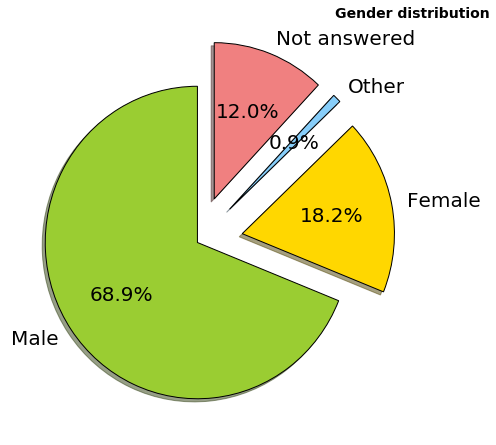

In [15]:
%matplotlib inline

# Make the percentages bigger! (readability)
mpl.rcParams['font.size'] = 20.0

fracs1 = np.mean(featured_gender.collect(), axis=0)

explode = (0.0, 0.3, 0.3, 0.3)
labels = ['Male', 'Female', 'Other', 'Not answered']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Gender distribution', fontsize=14, fontweight='bold')
ax1 = fig.add_subplot(121)
ax1.pie(fracs1, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

pass

In [ ]:
"""
Age barplot calculations
"""
def build_data_age(line):
    age = line[0]
    label_gender = line[36]
    
    if age == 'NA':
        return (label_gender, [1, 0, 0, 0, 0])
    else:
        age = int(age)
        if age <= 20:
            return (label_gender, [0, 1, 0, 0, 0])
        elif age > 20 and age <= 35:
            return (label_gender, [0, 0, 1, 0, 0])
        elif age > 35 and age <= 50:
            return (label_gender, [0, 0, 0, 1, 0])
        else:
            return (label_gender, [0, 0, 0, 0, 1])

featured_age = filtered_set.map(build_data_age)

males = featured_age.filter(lambda x: x[0] == 'male').map(lambda x: x[1])
females = featured_age.filter(lambda x: x[0] == 'female').map(lambda x: x[1])
not_answered = featured_age.filter(lambda x: x[0] == 'NA').map(lambda x: x[1])

sums_male = np.sum(males.collect(), axis=0)
sums_female = np.sum(females.collect(), axis=0)
sums_not_answered = np.sum(not_answered.collect(), axis=0)

print sums_male
print sums_female
print sums_not_answered

sum_total = np.sum([sums_male, sums_female, sums_not_answered])
print sum_total

[ 107 1518 7195 1645  301]
[  63  222 1901  531  123]
[1834   12   26    2    0]
15480


In [ ]:
%matplotlib inline

#Gender - Age arrays
males = featured_age.filter(lambda x: x[0] == 'male').map(lambda x: x[1])
females = featured_age.filter(lambda x: x[0] == 'female').map(lambda x: x[1])
not_answered = featured_age.filter(lambda x: x[0] == 'NA').map(lambda x: x[1])

sums_male = np.sum(males.collect(), axis=0)
sums_female = np.sum(females.collect(), axis=0)
sums_not_answered = np.sum(not_answered.collect(), axis=0)

#Age
N = 5
width = 0.5
LABELS = ["NA","<=20","21 - 35","36 - 50","50 <"]

#sum_age = np.sum(featured_age.collect(), axis = 0)

#ind = np.arange(N) = x_axis
x_axis = np.arange(N)

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1,1,1)

p1 = ax.bar(x_axis, sums_male, width, color= 'gold', align='center')
p2 = ax.bar(x_axis, sums_female, width, color='lightcoral', bottom=sums_male, align='center')
p3 = ax.bar(x_axis, sums_not_answered, width, color='yellowgreen', bottom= sums_male + sums_female, align='center')

ax.set_xlabel('Age')
ax.set_ylabel('Amount')
plt.xticks(x_axis, LABELS)

pass

In [ ]:
def build_data_employment(line):
    status = line[32]
    
    if status == 'Employed for wages':
        return [1, 0, 0, 0, 0, 0, 0]
    elif status == 'Self-employed freelancer' or status == 'Self-employed business owner':
        return [0, 1, 0, 0, 0, 0, 0]
    elif status == 'Doing an unpaid internship':
        return [0, 0, 1, 0, 0, 0, 0]
    elif status == 'Not working but looking for work':
        return [0, 0, 0, 1, 0, 0, 0]
    elif status == 'Not working and not looking for work':
        return [0, 0, 0, 0, 1, 0, 0]
    elif status == 'NA':
        return [0, 0, 0, 0, 0, 1, 0]
    else:
        return [0, 0, 0, 0, 0, 0, 1]

featured_employ = filtered_set.map(build_data_employment)

In [ ]:
%matplotlib inline

# Make the percentages bigger! (readability)
mpl.rcParams['font.size'] = 20.0

fracs_employ = np.mean(featured_employ.collect(), axis=0)

explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
labels = ['Employed', 'Self-employed', 'Internship','Not working but looking', 'Not working or looking', 'Not answered', 'Other']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'lime', 'aqua', 'orange']
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Gender distribution', fontsize=14, fontweight='bold')
ax1 = fig.add_subplot(121)
ax1.pie(fracs_employ, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

pass